In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('../data/delaney_solubility_with_descriptors.csv')
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [3]:
y_value = data['logS']
x_values = data.iloc[:, :4]

In [4]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
dtypes: float64(4)
memory usage: 35.9 KB


In [5]:
from sklearn.model_selection import train_test_split    

x_train, x_test, y_train, y_test = train_test_split(x_values, y_value, test_size=0.2, random_state=100)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

y_rfr_train_pred = rfr.predict(x_train)
y_rfr_test_pred = rfr.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
## Mean squared error 
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred) 
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
rfr_train_mse = mean_squared_error(y_train, y_rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test, y_rfr_test_pred)
## R2 score 
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
rfr_train_r2 = r2_score(y_train, y_rfr_train_pred)
rfr_test_r2 = r2_score(y_test, y_rfr_test_pred)

In [36]:
dict = {
    "Linear Regression" : [lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2],
    "Random Forest Regression" : [rfr_train_mse, rfr_train_r2, rfr_test_mse, rfr_test_r2]
}
results = pd.DataFrame(dict).transpose()
results.columns = ["Train MSE", "Train R2", "Test MSE", "Test R2"]
results

,Train MSE,Train R2,Test MSE,Test R2
Linear Regression,1.007536,0.764505,1.020695,0.789162
Random Forest Regression,1.028228,0.759669,1.407688,0.709223


[]

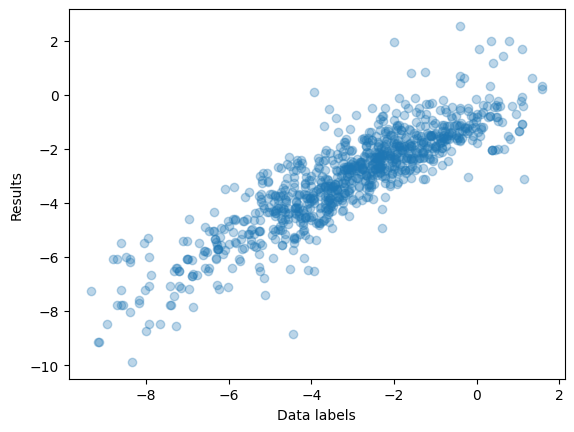

In [53]:
plt.scatter(y_train, y_lr_train_pred, alpha=0.3)
plt.ylabel("Predicted")
plt.xlabel("Experimental")
plt.plot()

Text(0.5, 0, 'Experimental')

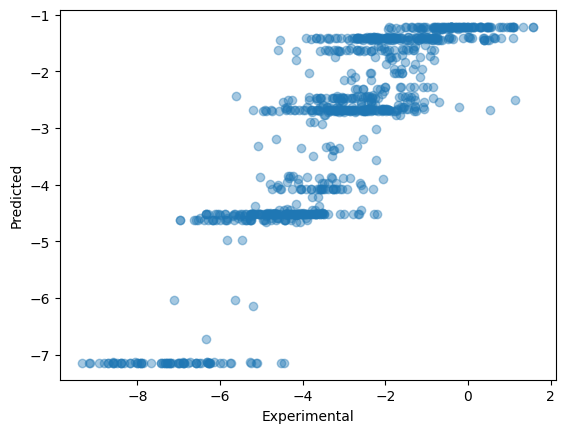

In [58]:
plt.scatter(y_train, y_rfr_train_pred, alpha=0.4)
plt.ylabel("Predicted")
plt.xlabel("Experimental")